In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df = pd.DataFrame(dataset['train'])

In [15]:
df['job_josted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
df_skills = df.explode('job_skills')

In [21]:
df_skills_da = df_skills[df_skills['job_title_short'] == 'Data Analyst']

In [28]:
stat_skills = df_skills_da.groupby(['job_skills']).agg(
    skill_count = ('job_skills', 'count'),
    salary_median = ('salary_year_avg', 'median')
)

stat_skills = stat_skills.sort_values(by='skill_count', ascending=False).nlargest(10, 'skill_count')

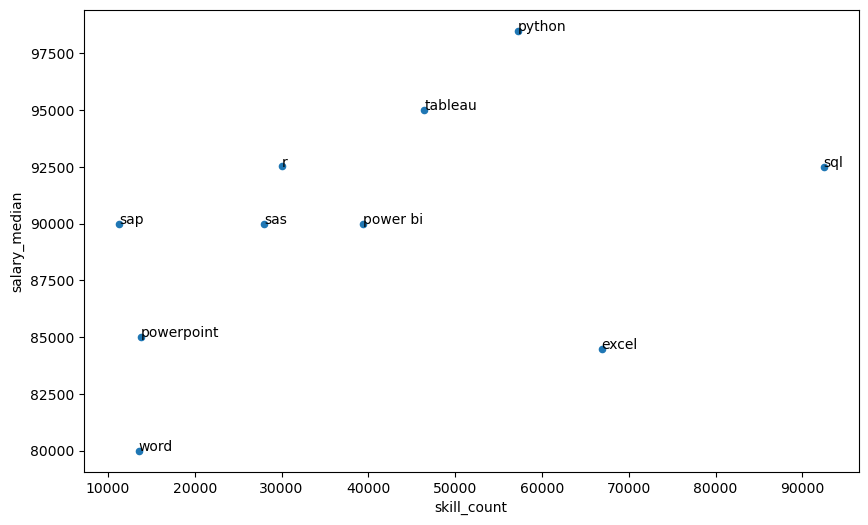

In [30]:
stat_skills.plot(kind = 'scatter', x='skill_count', y='salary_median', figsize=(10,6))

for i, row in stat_skills.iterrows():
    plt.text(row['skill_count'], row['salary_median'], i)

/var/folders/10/q7cz89bx5qzbm22tqw5z4nvc0000gn/T/ipykernel_5338/2464992218.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stat_skills['skill_count'][i], stat_skills['salary_median'][i], row)


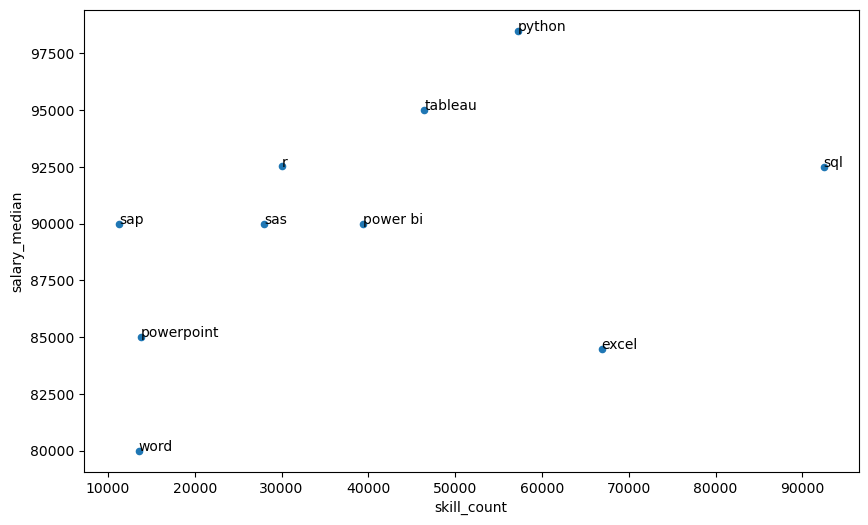

In [38]:
stat_skills.plot(kind = 'scatter', x='skill_count', y='salary_median', figsize=(10,6))

for i, row in enumerate(stat_skills.index):
   plt.text(stat_skills['skill_count'][i], stat_skills['salary_median'][i], row)

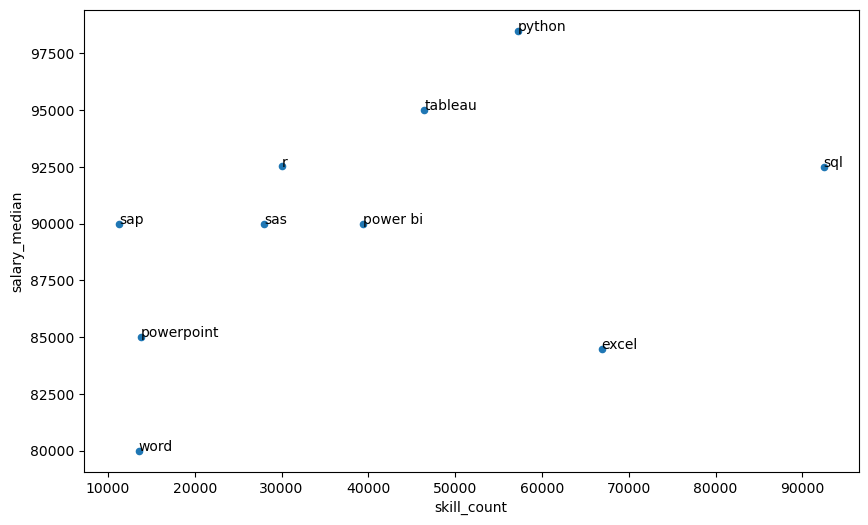

In [39]:
stat_skills.plot(kind = 'scatter', x='skill_count', y='salary_median', figsize=(10,6))

for i, row in enumerate(stat_skills.index):
   plt.text(stat_skills['skill_count'].iloc[i], stat_skills['salary_median'].iloc[i], row)